In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC



In [2]:
data=pd.read_csv('/content/diabetes (1).csv')

DATA EXPLORATION

In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


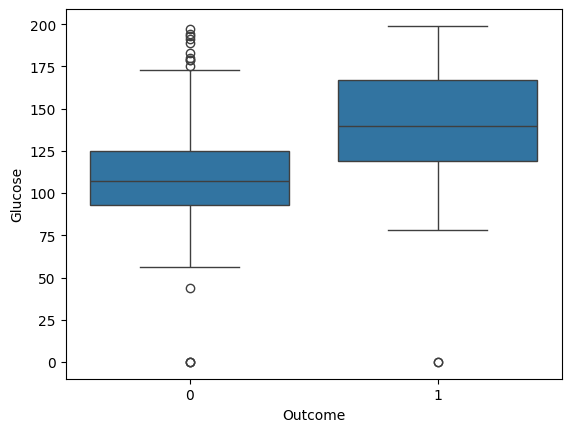

In [8]:
sns.boxplot(x='Outcome',y='Glucose',data=data)
plt.show()

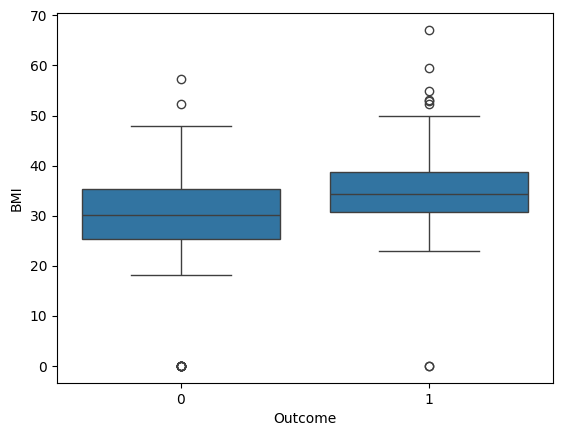

In [9]:
sns.boxplot(x='Outcome',y='BMI',data=data)
plt.show()

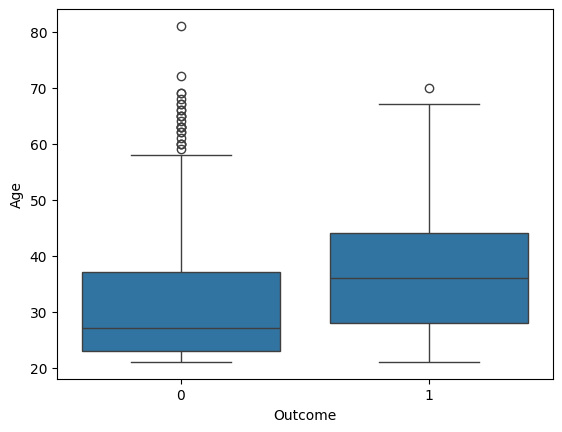

In [10]:
sns.boxplot(x='Outcome',y='Age',data=data)
plt.show()

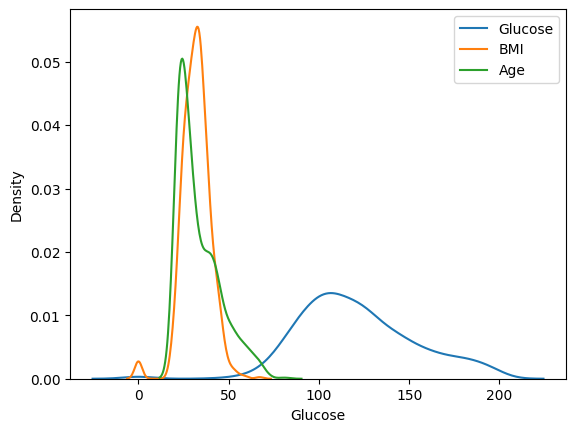

In [11]:
sns.kdeplot(data["Glucose"], label="Glucose")
sns.kdeplot(data["BMI"],label="BMI")
sns.kdeplot(data["Age"], label="Age")
plt.legend()
plt.show()


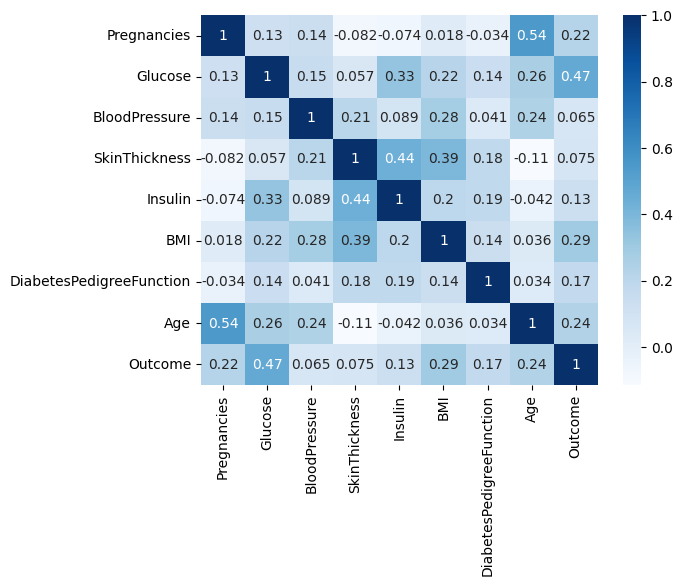

In [12]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

DATA PREPARATION

In [13]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

MODELING

In [14]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("classification report:\n",classification_report(y_test,y_pred))
print("model accuracy:\n",accuracy_score(y_test,y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       100
           1       0.66      0.65      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154

model accuracy:
 0.7597402597402597


In [15]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10,20,30]
}
grid = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("Best Random Forest Parameters:", grid.best_params_)

Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 100}


In [16]:
best_rf=grid.best_estimator_
best_rf.fit(X_train,y_train)
y_pred=best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("model accuracy:\n",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

model accuracy:
 0.7467532467532467


In [17]:
svm_model=SVC(kernel='rbf',probability=True)
svm_model.fit(X_train,y_train)
y_pred_svm=svm_model.predict(X_test)
print(classification_report(y_test,y_pred_svm))
print("model accuracy:\n",accuracy_score(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154

model accuracy:
 0.7467532467532467


In [18]:
param_grid_svm={
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf']
}
grid_svm=GridSearchCV(svm_model,param_grid_svm,cv=5,scoring='f1')
grid_svm.fit(X_train,y_train)
print("Best SVM Parameters:", grid_svm.best_params_)


Best SVM Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [19]:
y_pred_svm_best = grid_svm.predict(X_test)
print("Tuned SVM Performance\n:",classification_report(y_test, y_pred_svm_best))
print("model accuracy:\n",accuracy_score(y_test,y_pred_svm_best))

Tuned SVM Performance
:               precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.61      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

model accuracy:
 0.7142857142857143


EVALUATION

In [20]:
def predict_diabetes(model, scaler, new_data):
    feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

    new_df = pd.DataFrame([new_data], columns=feature_names)
    new_data_scaled = scaler.transform(new_df)
    prediction = model.predict(new_data_scaled)[0]
    return "Diabetic" if prediction == 1 else "Non-Diabetic"


In [21]:
example_patient = [1, 150, 70, 30, 0, 33.6, 0.627, 40]
print("Prediction :", predict_diabetes(grid.best_estimator_, scaler, example_patient))


Prediction : Diabetic
